In [1]:
!pip install pandas-datareader

     |████████████████████████████████| 109 kB 7.7 MB/s eta 0:00:01


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
import pandas_datareader as pdr

%matplotlib inline

In [20]:
start = datetime(2012, 1, 1)
end = datetime(2022, 12, 1)

df_aapl = pdr.get_data_yahoo('AAPL', start, end)

In [21]:
df_aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.519277
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.586559
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.726295
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.859333
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.838934


In [22]:
df_aapl.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-11-25,148.880005,147.119995,148.309998,148.110001,35195900.0,148.110001
2022-11-28,146.639999,143.380005,145.139999,144.220001,69246000.0,144.220001
2022-11-29,144.809998,140.350006,144.289993,141.169998,83763800.0,141.169998
2022-11-30,148.720001,140.550003,141.399994,148.029999,111224400.0,148.029999
2022-12-01,149.130005,146.610001,148.210007,148.309998,71250400.0,148.309998


In [23]:
df_aapl.describe().T

,count,mean,std,min,25%,50%,75%,max
High,2748.0,5.868097e+01,4.826892e+01,1.427143e+01,2.432884e+01,3.757000e+01,7.523125e+01,1.829400e+02
Low,2748.0,5.739650e+01,4.704147e+01,1.375357e+01,2.386938e+01,3.682875e+01,7.293625e+01,1.791200e+02
Open,2748.0,5.802941e+01,4.764265e+01,1.385607e+01,2.411518e+01,3.723125e+01,7.407250e+01,1.826300e+02
Close,2748.0,5.806448e+01,4.768337e+01,1.394750e+01,2.411250e+01,3.731750e+01,7.442875e+01,1.820100e+02
Volume,2748.0,2.044501e+08,1.720645e+08,3.519590e+07,9.565470e+07,1.406028e+08,2.494301e+08,1.506120e+09
Adj Close,2748.0,5.616151e+01,4.825205e+01,1.206459e+01,2.189003e+01,3.540737e+01,7.305875e+01,1.809597e+02


In [25]:
#check any na in the data

df_aapl.isna().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [26]:
#check if dtype is datetime
df_aapl.index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2022-11-17', '2022-11-18', '2022-11-21', '2022-11-22',
               '2022-11-23', '2022-11-25', '2022-11-28', '2022-11-29',
               '2022-11-30', '2022-12-01'],
              dtype='datetime64[ns]', name='Date', length=2748, freq=None)

In [27]:
#check Dtype
df_aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2748 entries, 2012-01-03 to 2022-12-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2748 non-null   float64
 1   Low        2748 non-null   float64
 2   Open       2748 non-null   float64
 3   Close      2748 non-null   float64
 4   Volume     2748 non-null   float64
 5   Adj Close  2748 non-null   float64
dtypes: float64(6)
memory usage: 150.3 KB


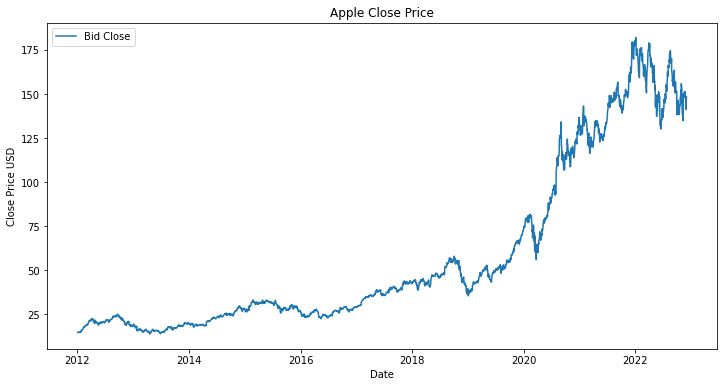

In [29]:
plt.figure(figsize=(12,6))
plt.plot(df_aapl['Close'])
plt.title('Apple Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.legend(['Bid Close'])
plt.show()

<AxesSubplot:xlabel='Date'>

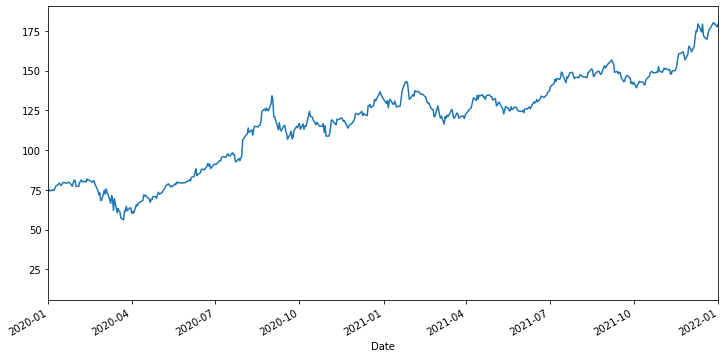

In [35]:
#closer look at the uptrend 

df_aapl['Close'].plot(xlim=['2020-01-01', '2022-'], figsize=(12,6))

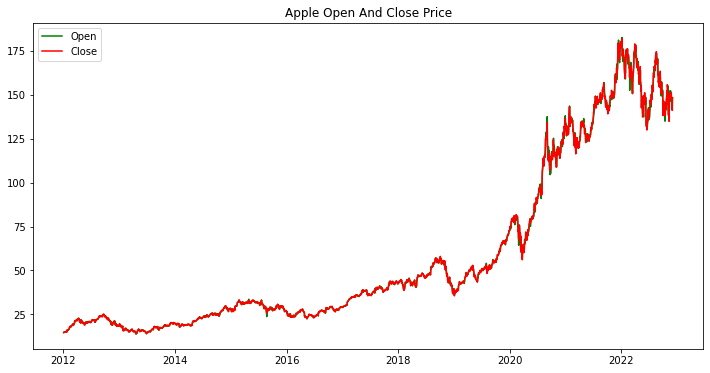

In [75]:
plt.figure(figsize=(12,6))
plt.plot(df_aapl['Open'], c='green')
plt.plot(df_aapl['Close'], c='red')
plt.title('Apple Open And Close Price')
plt.legend(['Open', 'Close'])

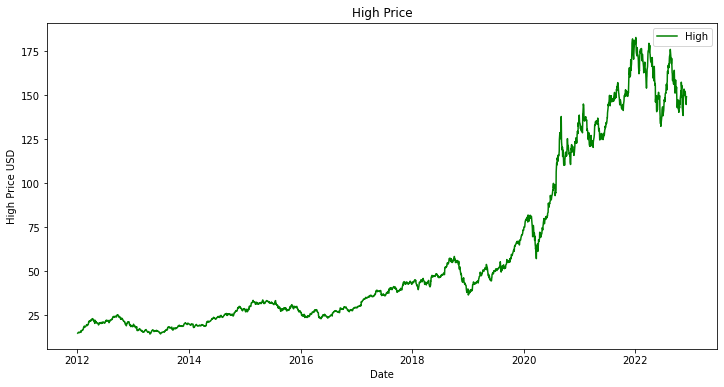

In [30]:
#High price

plt.figure(figsize=(12,6))
plt.plot(df_aapl['High'], c='green')
plt.title('High Price')
plt.xlabel('Date')
plt.ylabel('High Price USD')
plt.legend(['High'])
plt.show()

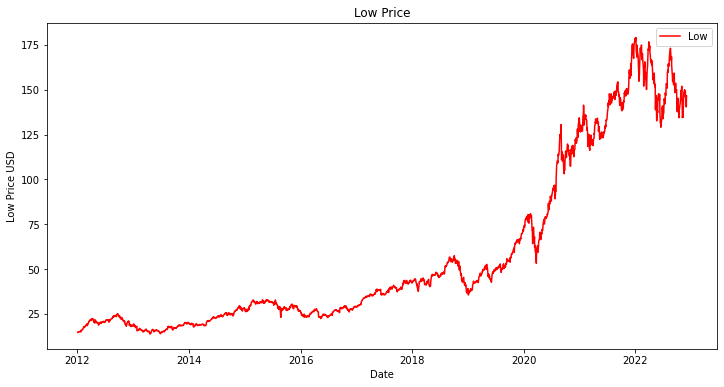

In [31]:
#Low price

plt.figure(figsize=(12,6))
plt.plot(df_aapl['Low'], c='red')
plt.title('Low Price')
plt.xlabel('Date')
plt.ylabel('Low Price USD')
plt.legend(['Low'])
plt.show()

<AxesSubplot:>

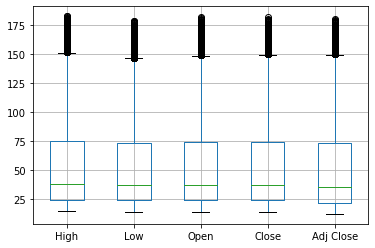

In [33]:
df_aapl.drop('Volume', axis=1).boxplot()

<AxesSubplot:>

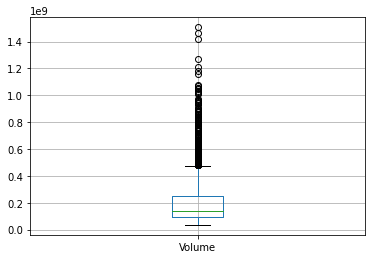

In [34]:
df_aapl[['Volume']].boxplot()

Text(0, 0.5, 'Volume')

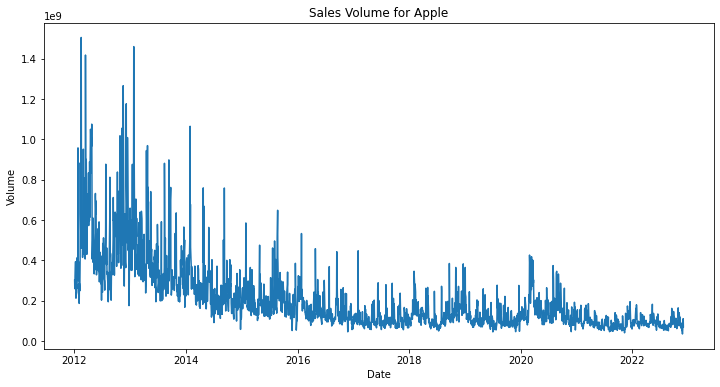

In [81]:
#Trade volume of apple
plt.figure(figsize=(12,6))
plt.plot(df_aapl['Volume'])
plt.title('Sales Volume for Apple')
plt.xlabel('Date')
plt.ylabel('Volume')

Text(0, 0.5, '% of Return')

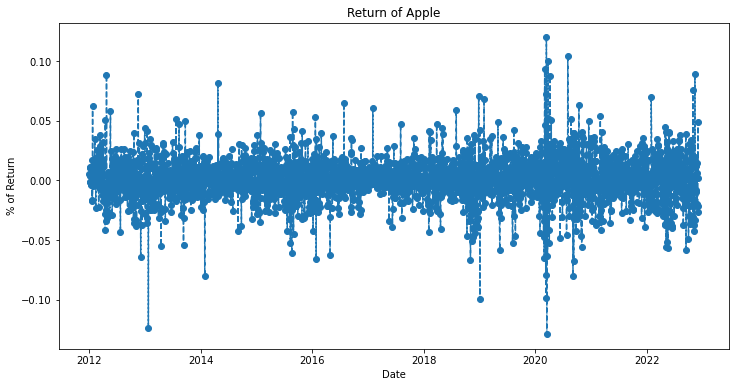

In [89]:
# Return of apple

plt.figure(figsize=(12, 6))
plt.plot(df_aapl['Adj Close'].pct_change(), linestyle='--', marker='o')
plt.title('Return of Apple')
plt.xlabel('Date')
plt.ylabel('% of Return')


Text(0.5, 1.0, 'Average Daily Return of Apple')

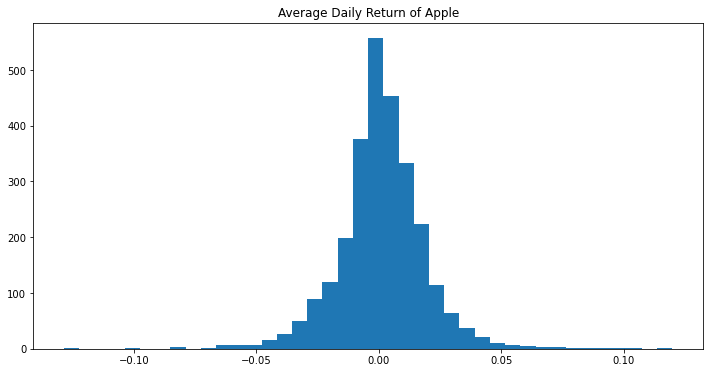

In [93]:
# Daily Return Average of apple

plt.figure(figsize=(12, 6))
plt.hist(df_aapl['Adj Close'].pct_change(), bins=40)
plt.title('Average Daily Return of Apple')


## Time Resampling

In [36]:
# annually close mean price

df_aapl.resample(rule='A').mean()['Close']

Date
2012-12-31     20.573204
2013-12-31     16.879817
2014-12-31     23.066164
2015-12-31     30.010000
2016-12-31     26.151002
2017-12-31     37.637769
2018-12-31     47.263357
2019-12-31     52.063988
2020-12-31     95.347075
2021-12-31    140.989365
2022-12-31    156.348485
Freq: A-DEC, Name: Close, dtype: float64

Text(0, 0.5, 'Price USD')

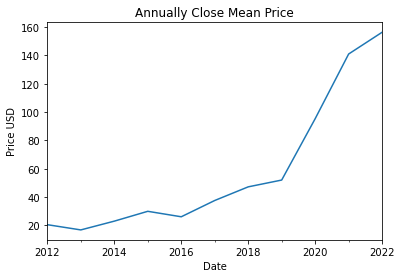

In [47]:
# annually close mean price plot

df_aapl.resample(rule='A').mean()['Close'].plot()
plt.title('Annually Close Mean Price')
plt.xlabel('Date')
plt.ylabel('Price USD')

In [42]:
## annually close price max

df_aapl.resample(rule='A').max()['Close']

Date
2012-12-31     25.075001
2013-12-31     20.360357
2014-12-31     29.750000
2015-12-31     33.250000
2016-12-31     29.562500
2017-12-31     44.105000
2018-12-31     58.017502
2019-12-31     73.412498
2020-12-31    136.690002
2021-12-31    180.330002
2022-12-31    182.009995
Freq: A-DEC, Name: Close, dtype: float64

Text(0, 0.5, 'Price USD')

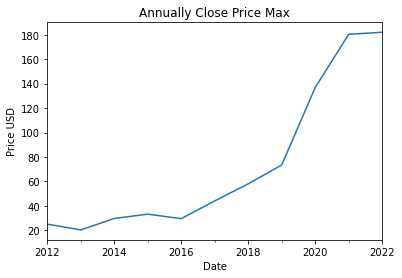

In [43]:
## annually close price max plot

df_aapl.resample(rule='A').max()['Close'].plot()
plt.title('Annually Close Price Max')
plt.xlabel('Date')
plt.ylabel('Price USD')

In [44]:
# annually close price min

df_aapl.resample(rule='A').min()['Close']

Date
2012-12-31     14.686786
2013-12-31     13.947500
2014-12-31     17.849285
2015-12-31     25.780001
2016-12-31     22.584999
2017-12-31     29.004999
2018-12-31     36.707500
2019-12-31     35.547501
2020-12-31     56.092499
2021-12-31    116.360001
2022-12-31    130.059998
Freq: A-DEC, Name: Close, dtype: float64

<AxesSubplot:xlabel='Date'>

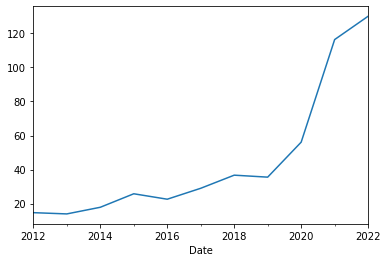

In [45]:
# annually close price min

df_aapl.resample(rule='A').min()['Close'].plot()

In [48]:
#Date of the highest close

df_aapl['Close'].idxmax()

Timestamp('2022-01-03 00:00:00')

In [51]:
# Price of higest close

df_aapl['Close'].max()

182.00999450683594

In [52]:
#Date of the lowest close

df_aapl['Close'].idxmin()

Timestamp('2013-04-19 00:00:00')

In [53]:
#Price of the lowest close

df_aapl['Close'].min()

13.947500228881836

In [59]:
#simple moving average
df_aapl['Close:5 days rolling'] = df_aapl['Close'].rolling(window=5).mean()
df_aapl['Close:10 days rolling'] = df_aapl['Close'].rolling(window=10).mean()
df_aapl['Close:30 days rolling'] = df_aapl['Close'].rolling(window=30).mean()
df_aapl['Close:60 days rolling'] = df_aapl['Close'].rolling(window=60).mean()
df_aapl['Close:90 days rolling'] = df_aapl['Close'].rolling(window=90).mean()
df_aapl['Close:365 days rolling'] = df_aapl['Close'].rolling(window=365).mean()

Text(0, 0.5, 'Date')

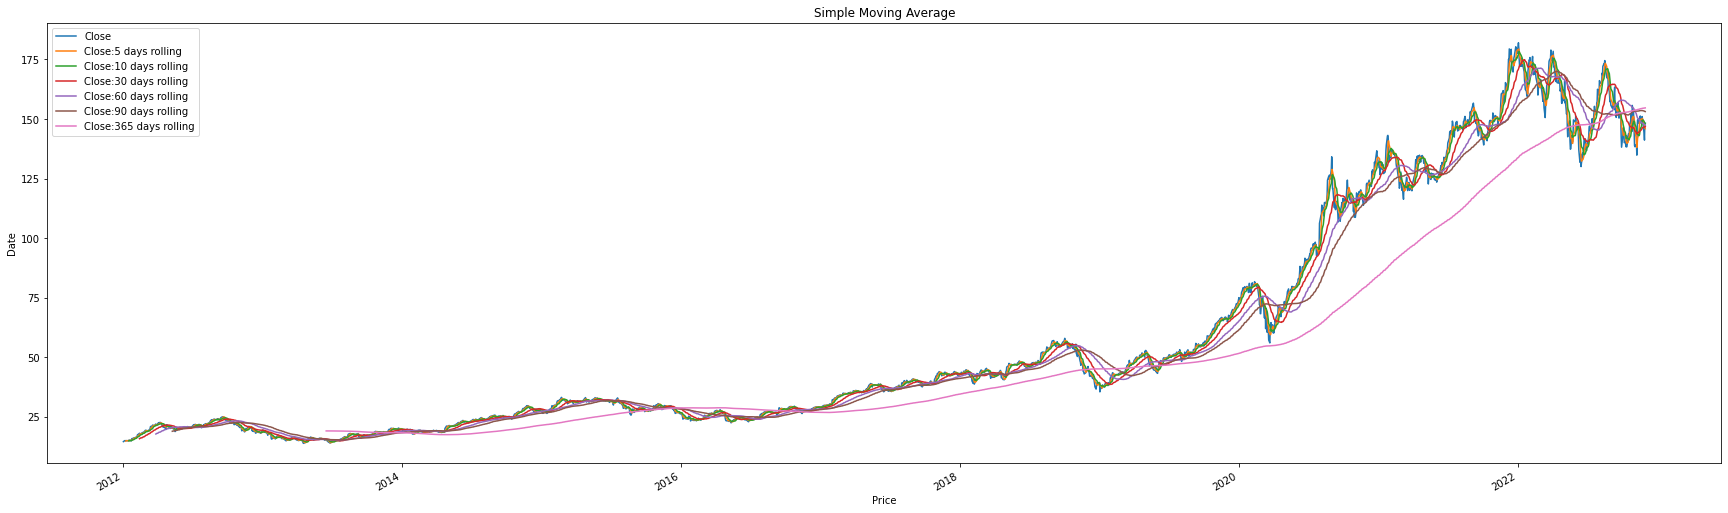

In [67]:
df_aapl[['Close', 'Close:5 days rolling', 'Close:10 days rolling', 'Close:30 days rolling', 'Close:60 days rolling', 'Close:90 days rolling', 'Close:365 days rolling']].plot(figsize=(30, 9))
plt.title('Simple Moving Average')
plt.xlabel('Price')
plt.ylabel('Date')

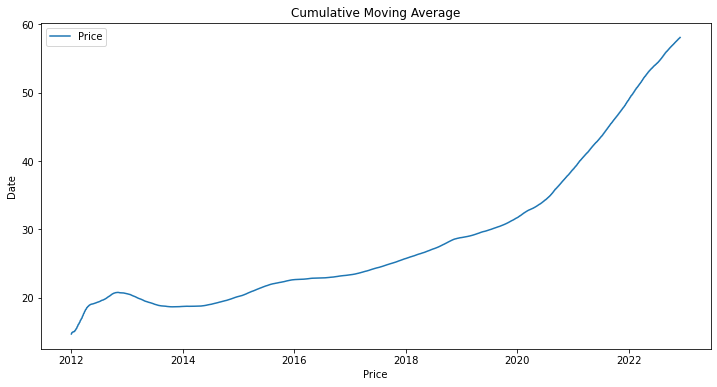

In [101]:
# Cumulative moving average
plt.figure(figsize=(12,6))
plt.plot(df_aapl['Close'].expanding().mean())
plt.title('Cumulative Moving Average')
plt.xlabel('Price')
plt.ylabel('Date')
plt.legend(['Price'])

df_aapl['Close:5 days rolling'] = df_aapl['Close'].rolling(window=5).mean()
df_aapl['Close:10 days rolling'] = df_aapl['Close'].rolling(window=10).mean()
df_aapl['Close:30 days rolling'] = df_aapl['Close'].rolling(window=30).mean()
df_aapl['Close:60 days rolling'] = df_aapl['Close'].rolling(window=60).mean()
df_aapl['Close:90 days rolling'] = df_aapl['Close'].rolling(window=90).mean()
df_aapl['Close:365 days rolling'] = df_aapl['Close'].rolling(window=365).mean()

In [96]:
# Exponential moving average
df_aapl['EMA_5days'] = df_aapl['Close'].ewm(span=5).mean()
df_aapl['EMA_10days'] = df_aapl['Close'].ewm(span=10).mean()
df_aapl['EMA_30days'] = df_aapl['Close'].ewm(span=30).mean()
df_aapl['EMA_60days'] = df_aapl['Close'].ewm(span=60).mean()
df_aapl['EMA_90days'] = df_aapl['Close'].ewm(span=90).mean()
df_aapl['EMA_365days'] = df_aapl['Close'].ewm(span=365).mean()


Text(0, 0.5, 'Date')

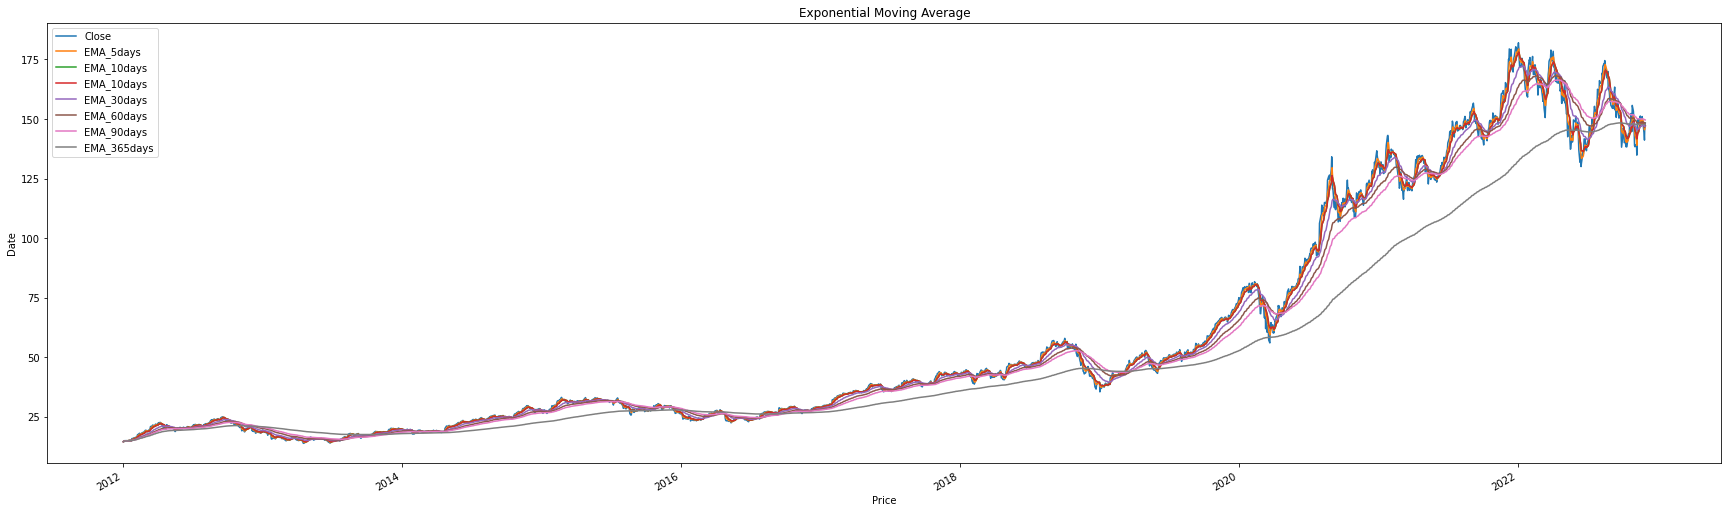

In [97]:
df_aapl[['Close', 'EMA_5days', 'EMA_10days', 'EMA_10days', 'EMA_30days', 'EMA_60days', 'EMA_90days', 'EMA_365days']].plot(figsize=(30, 9))
plt.title('Exponential Moving Average')
plt.xlabel('Price')
plt.ylabel('Date')